# Download Data

In [1]:
import requests
import pandas as pd
from io import BytesIO

def download_csv(csv_url):
    response = requests.get(csv_url)
    response.raise_for_status()

    # Qui puoi modificare 'sep' o aggiungere altri parametri se necessario
    try:
        df = pd.read_csv(BytesIO(response.content), sep=',')
    except pd.errors.ParserError:
        df = pd.read_csv(BytesIO(response.content), sep=';', error_bad_lines=False)

    return df

In [2]:
recipes_df = download_csv("https://media.githubusercontent.com/media/DonatoFe11/SustainaMeal_Case_Study/master/data/final_recipes_set.csv")

In [3]:
recipes_df

,title,sustainability_score,sustainability_label,Unnamed: 0,recipe_id,description,author_id,duration,directions,ingredients,...,protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names,healthiness_label
0,Boiled Radishes,0.002502,0,294268,179840,These taste a lot like new potatoes. The boil...,254469,22.0,"['Trim ends and bad spots off Radishes.', 'Boi...","['radishes size bag bunch', 'water radishes']",...,0.8,2,2,0.293040,1.000,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['applesauce', 'garlic clove', 'ginger', 'mola...",0
1,Apple Cider Reduction,0.002623,0,59722,521756,I saw a post about this on Facebook and gave i...,171084,155.0,"['In 6-8 quart stock pan, measure out 2 cups o...","['gallon apple cider fresh', 'gallon apple cid...",...,0.0,10,2,0.214286,0.750,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['bean sprouts', 'chicken thighs', 'fresh ging...",1
2,Homemade Apple Pectin Stock,0.002623,0,159910,25188,Easy to make and works well.,10404,25.0,['Slice unpeeled apples including cores and se...,"['tart apple', 'water pound apples']",...,1.2,11,2,0.278414,0.750,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking powder', 'baking soda', 'cinnamon', '...",0
3,Easy Applesauce,0.002623,0,421226,264179,Use fresh cooking apples for this for best res...,37636,50.0,['Place apples and cider into a large saucepan...,"['apples', 'apple cider']",...,0.5,3,2,0.276525,0.875,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['carrots', 'fresh peas', 'fresh tomatoes', 'g...",0
4,Cider Baked Sausage,0.002752,0,374088,101966,A very easy to make main dish perfect for fall...,30534,50.0,"['Preheat oven to 350°.', 'Prick sausages with...","['breakfast sausage links', 'apples Smith', 'o...",...,46.4,4,4,0.146714,0.125,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Shedd Spread Country Crock', 'cayenne pepper...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93743,Curried Lamb on Rice,0.951024,2,103145,373244,"With modification this recipe is from ""The Dia...",133174,65.0,"['Over medium heat, melt the butter in a large...","['lamb', 'medium onion', 'cloves', 'butter', '...",...,28.7,5,13,0.223549,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Dijon mustard', 'Polish sausage', 'apricot p...",1
93744,Rich Lamb Curry,0.960504,2,442694,268247,The recipe isn't as time consuming as it looks...,491437,110.0,"['Heat 1 tbsp olive oil in dutch oven. ', 'Co...","['oil', 'lamb', 'flour', 'salt pepper', 'onion...",...,36.1,9,21,0.153328,0.000,0.00,NaN,NaN,NaN,1
93745,"Middle Eastern Slow-Cooked Stew With Lamb, Chi...",0.968458,2,359960,144850,From Cooking Light. Per 3/4 c. serving: 310 ca...,37779,112.0,['Let the oil get heating in a large pot over ...,"['oil', 'lamb', 'onions rings', 'water', 'clov...",...,20.8,12,19,0.205566,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['anchovies', 'celery ribs', 'diced tomatoes',...",1
93746,Five Meat Chili Con Carne With Beans,0.971454,2,37637,13568,yum,20571,210.0,"['In a large pot brown meat in stages, about a...","['beef', 'pork', 'lamb', 'sausage', 'sausage',...",...,14.5,7,15,0.197568,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"[""French\\'s French fried onions"", 'crabmeat',...",1


# SustainaMeal (ETA: 15/20 mins)

Initializes the system by loading the data and preparing the embeddings.

In [15]:
from HeASe.sustainameal import SustainaMeal

#nutrients = ['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']
nutrients = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

sm = SustainaMeal(
    recipes_df=recipes_df,
    nutrients=['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]'],
    transformer_name='davanstrien/autotrain-recipes-2451975973'
)

Processing Titles embeddings: 100%|██████████| 93748/93748 [18:31<00:00, 84.37batch/s]


In [16]:
recipe_titles = [
    "Spicy Thai Basil Chicken",
    "Classic Margherita Pizza",
    "Vegan Quinoa & Black Bean Salad",
    "Mediterranean Grilled Salmon",
    "Creamy Mushroom Risotto",
    "Korean BBQ Beef Tacos",
    "Butternut Squash Soup",
    "Spinach and Feta Stuffed Chicken",
    "Vegetarian Chickpea Curry",
    "Classic French Ratatouille",
    "Greek Salad with Homemade Dressing",
    "Mexican Street Corn (Elote)",
    "Italian Beef Lasagna",
    "Vegan Avocado Chocolate Mousse",
    "Moroccan Lamb Tagine",
    "Japanese Ramen with Pork Belly",
    "Cauliflower Buffalo Wings (Vegan)",
    "Spanish Paella with Seafood",
    "Coconut and Lime Prawn Skewers",
    "Maple Glazed Roasted Carrots",
    "Lemon and Herb Roasted Chicken",
    "Vegetarian Pad Thai",
    "Apple Cinnamon Oatmeal (Vegan)",
    "Traditional Indian Butter Chicken",
    "Tuscan Garlic Shrimp Pasta",
    "Korean Kimchi Pancakes",
    "Baked Stuffed Peppers",
    "Creamy Tomato Basil Soup",
    "Balsamic Glazed Brussels Sprouts",
    "Strawberry Cheesecake (No-Bake)"
]


In [17]:
nutrients_string = ", ".join(nutrients)
print(nutrients_string)

calories [cal], totalFat [g], saturatedFat [g], cholesterol [mg], sodium [mg], dietaryFiber [g], sugars [g], protein [g]


In [7]:
results = []

In [18]:
acceptable_tags = ['appetizers', 'main-dish', 'side-dishes', 'drinks', 'beverages', 'fruits', 'desserts',
                   'breakfast', 'pasta-rice-and-grains', 'rice', 'pasta', 'pizza', 'breads', 'meat', 'fish',
                   'seafood', 'beef', 'chicken', 'vegetarian']

In [9]:
# Definisci le soglie
WHO_SCORE_THRESHOLDS = ( 0.15, 0.25)  # (soglia media, soglia alta)
SUSTAINABILITY_SCORE_THRESHOLDS = (0.9, 0.5)  # (soglia media, soglia alta)

# Funzioni di aiuto per calcolare le label
def calculate_healthiness_label(who_score):
    if who_score > WHO_SCORE_THRESHOLDS[1]:
        return "0"
    elif who_score < WHO_SCORE_THRESHOLDS[0]:
        return "2"
    else:
        return "1"

def calculate_sustainability_label(sustainability_score):
    if sustainability_score >= SUSTAINABILITY_SCORE_THRESHOLDS[0]:
        return "0"
    elif sustainability_score <= SUSTAINABILITY_SCORE_THRESHOLDS[1]:
        return "2"
    else:
        return "1"

# Calcola le label in base ai valori di who_score e sustainability_score

In [19]:
# Parametri per gli esperimenti
k_values = [1, 10, 50, 100]
match_all_tags_values = [True, False]

def convert_to_serializable(obj):
    """
    Converte oggetti in formati serializzabili in JSON.
    Gestisce DataFrame, array NumPy e altri tipi non serializzabili.
    """
    if hasattr(obj, 'to_dict'):
        # Converti il DataFrame pandas in un dizionario
        return obj.to_dict('records')
    elif hasattr(obj, 'tolist'):
        # Converti l'array NumPy in una lista
        return obj.tolist()
    elif isinstance(obj, (list, dict, str, int, float, bool, type(None))):
        # Tipi già serializzabili in JSON
        return obj
    else:
        # Converti altri tipi in stringa o implementa altre conversioni
        return str(obj)



for input_recipe in recipe_titles:

    for k in k_values:
        for match_all_tags in match_all_tags_values:

          try:
              similar_recipes = sm.find_similar_recipes(input_recipe, k, acceptable_tags, match_all_tags=match_all_tags)
          except Exception as e:
              print(f"An error occurred while finding similar recipes: {e}")
              similar_recipes = None  # or set it to a default value or take other appropriate actions

          # Continue with the rest of your code, making sure to handle the case where similar_recipes is None
          if similar_recipes is not None:
            recipe_by_sustainameal_score = sm.order_recipe_by_sustainameal()

            healthiness_label = calculate_healthiness_label(sm.original_scores[0]['who_score'])
            sustainability_label = calculate_sustainability_label(sm.original_scores[0]['sustainability_score'])

            result = {
                'recipe_name': input_recipe,
                'sustnability_score':sm.original_scores[0]['sustainability_score'],
                'sustnability_label': sustainability_label ,
                'who_score': sm.original_scores[0]['who_score'],
                'healthiness_label': healthiness_label ,
                'k': k,
                'nutrients' : nutrients_string,
                'match_all_tags': match_all_tags,
                'similar_recipes': convert_to_serializable(similar_recipes),
                'ordered_by_sustainameal': convert_to_serializable(recipe_by_sustainameal_score[:10])

            }
            results.append(result)


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 41.43batch/s]

Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.32batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.06batch/s]


Tags to match: ['chicken']
Number of filtered recipes: 6366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.31batch/s]


Tags to match: ['chicken']
Number of filtered recipes: 6366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.34batch/s]


Tags to match: ['chicken']
Number of filtered recipes: 6366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.06batch/s]


Tags to match: ['chicken']
Number of filtered recipes: 6366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.22batch/s]


Tags to match: ['chicken']
Number of filtered recipes: 6366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.93batch/s]


Tags to match: ['chicken']
Number of filtered recipes: 6366


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.31batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.47batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.43batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.15batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.52batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 51.92batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.27batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 81.65batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.24batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.36batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.44batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.53batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.74batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.80batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.25batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.80batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.87batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.80batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.53batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3361


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.85batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 26549


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.40batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3361


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.84batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 26549


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.93batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 3361


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.53batch/s]


Tags to match: ['main-dish', 'seafood']
Number of filtered recipes: 26549


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.66batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.36batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.81batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.21batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.82batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.26batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.18batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.52batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.57batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.74batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.29batch/s]


Tags to match: ['meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.07batch/s]


Tags to match: ['meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.15batch/s]


Tags to match: ['meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.31batch/s]


Tags to match: ['meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.53batch/s]


Tags to match: ['meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.56batch/s]


Tags to match: ['meat']
Number of filtered recipes: 17375


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.35batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.22batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.08batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.02batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.93batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.55batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.26batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.83batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.10batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.57batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.91batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.16batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.11batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.89batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.25batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.73batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.67batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.41batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.64batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3007


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.29batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 36427


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.58batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3007


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.53batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 36427


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.13batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 3007


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.97batch/s]


Tags to match: ['main-dish', 'vegetarian']
Number of filtered recipes: 36427


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.29batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.78batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.82batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.90batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.92batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.61batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.14batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.31batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.98batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.23batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.56batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.13batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.42batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.43batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.28batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.73batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 48.27batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.90batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.34batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.95batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.17batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.89batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.28batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.40batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.98batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.61batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.50batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.61batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.63batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.81batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.62batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.75batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.00batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.68batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.80batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.95batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.79batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.59batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.52batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.90batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.99batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13060


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 70.59batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.43batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13060


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 56.79batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.42batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13060


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.68batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.59batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 13060


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.41batch/s]


Tags to match: ['main-dish', 'meat']
Number of filtered recipes: 28937


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.36batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.61batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 79.67batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.33batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.36batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.75batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.45batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.22batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.27batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.42batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 52.19batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.20batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.99batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.46batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.37batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.96batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.49batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.48batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.69batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.70batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.23batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.25batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.93batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 61.88batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.25batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.08batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.88batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.69batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.15batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.58batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.78batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.50batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.76batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.15batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.15batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 60.30batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.43batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.42batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.76batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.30batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 58.63batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.48batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.07batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 54.94batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.80batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.93batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.16batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.17batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.93batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.83batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.25batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.74batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.51batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 47.05batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.46batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.21batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.99batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.56batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.13batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.65batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.79batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.49batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.50batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.81batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.12batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.32batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.19batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 77.73batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 53.33batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.63batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.38batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.67batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 76.57batch/s]


Tags to match: ['pasta']
Number of filtered recipes: 12334


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.84batch/s]


Tags to match: ['pasta']
Number of filtered recipes: 12334


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.58batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 12333


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.55batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 12334


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.27batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 12333


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.57batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 12334


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.26batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 12333


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.10batch/s]


Tags to match: ['pasta', 'pasta-rice-and-grains']
Number of filtered recipes: 12334


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.49batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 59.37batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 69.33batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.09batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.57batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 72.27batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.94batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.81batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.10batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.91batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.81batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.25batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.63batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.39batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.69batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 73.68batch/s]


Tags to match: ['main-dish']
Number of filtered recipes: 24622


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.51batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.53batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 75.40batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 62.78batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.32batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.23batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.21batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.96batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 71.39batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 12609


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.75batch/s]


Tags to match: ['side-dishes']
Number of filtered recipes: 12609


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.96batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.32batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 65.27batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.37batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.68batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.53batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.11batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 68.21batch/s]


Tags to match: []
An error occurred while finding similar recipes: No tag found to match.


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 78.06batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 55.16batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 63.78batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 66.34batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 67.15batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


Processing Titles embeddings: 100%|██████████| 1/1 [00:00<00:00, 64.31batch/s]


Tags to match: ['desserts']
Number of filtered recipes: 21618


In [20]:
len(results)

176

In [21]:
import json
with open('experiment_unkown_recipes_results.json', 'w') as file:
    json.dump(results, file)


In [22]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_unkown_recipes_results.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Filtra il DataFrame sperimentale in base ai titoli delle ricette per ottenere il sottogruppo
selected_recipes_df = experiment_df[experiment_df['recipe_name'].isin(recipe_titles)]

# Funzioni come prima
def estrai_incrementi(ordered_list, key):
    return [d[key] for d in ordered_list if key in d]

# Calcolo degli incrementi come prima
selected_recipes_df['healthiness_increment'] = selected_recipes_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'healthiness_increment'))
selected_recipes_df['sustainability_increment'] = selected_recipes_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'sustainability_increment'))
selected_recipes_df['sustainameal_score_increment'] = selected_recipes_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'sustainameal_score_increment'))

# Calcolare la media degli incrementi come prima
selected_recipes_df['healthiness_increment_mean'] = selected_recipes_df['healthiness_increment'].apply(lambda x: sum(x) / len(x) if x else 0)
selected_recipes_df['sustainability_increment_mean'] = selected_recipes_df['sustainability_increment'].apply(lambda x: sum(x) / len(x) if x else 0)
selected_recipes_df['sustainameal_score_increment_mean'] = selected_recipes_df['sustainameal_score_increment'].apply(lambda x: sum(x) / len(x) if x else 0)

# Calcola le medie per il sottogruppo selezionato
medie_selected_recipes = selected_recipes_df.groupby(['k', 'nutrients', 'match_all_tags']).agg({
    'healthiness_increment_mean': 'mean',
    'sustainability_increment_mean': 'mean',
    'sustainameal_score_increment_mean': 'mean'
}).reset_index()

# Visualizzare le medie per il sottogruppo selezionato
print("Medie per il sottogruppo selezionato:")
print(medie_selected_recipes)


Medie per il sottogruppo selezionato:
      k                                          nutrients  match_all_tags  \
0     1  calories [cal], totalFat [g], saturatedFat [g]...           False   
1     1  calories [cal], totalFat [g], saturatedFat [g]...            True   
2     1  calories [cal], totalFat [g], sodium [mg], die...           False   
3     1  calories [cal], totalFat [g], sodium [mg], die...            True   
4    10  calories [cal], totalFat [g], saturatedFat [g]...           False   
5    10  calories [cal], totalFat [g], saturatedFat [g]...            True   
6    10  calories [cal], totalFat [g], sodium [mg], die...           False   
7    10  calories [cal], totalFat [g], sodium [mg], die...            True   
8    50  calories [cal], totalFat [g], saturatedFat [g]...           False   
9    50  calories [cal], totalFat [g], saturatedFat [g]...            True   
10   50  calories [cal], totalFat [g], sodium [mg], die...           False   
11   50  calories [cal], t

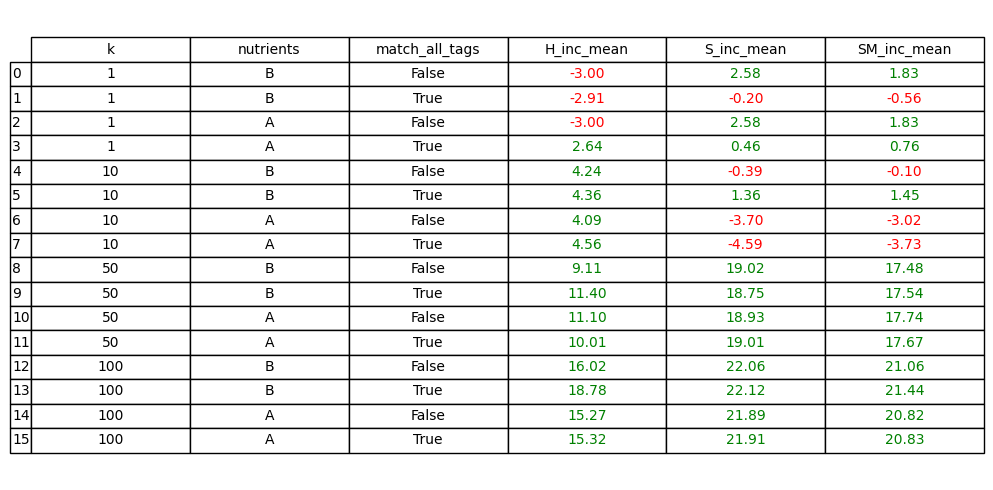

In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import table

# Funzione per abbreviare i titoli delle colonne
def abbreviate_column_names(df):
    abbreviations = {'healthiness_increment_mean': 'H_inc_mean',
                     'sustainability_increment_mean': 'S_inc_mean',
                     'sustainameal_score_increment_mean': 'SM_inc_mean'}
    return df.rename(columns=abbreviations)

# Applica l'abbreviazione ai nomi delle colonne
medie_selected_recipes = abbreviate_column_names(medie_selected_recipes)

# Funzione per sostituire la stringa dei nutrienti con 'A' o 'B'
def replace_nutrients(nutrient_string):
    # Definisci le liste di nutrienti
    nutrients_A = ['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']
    nutrients_B = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

    if nutrient_string == ', '.join(nutrients_A):
        return 'A'
    elif nutrient_string == ', '.join(nutrients_B):
        return 'B'
    else:
        return 'Unknown'

# Applica la funzione di sostituzione
medie_selected_recipes['nutrients'] = medie_selected_recipes['nutrients'].apply(replace_nutrients)

# Funzione per colorare i valori in base al segno e arrotondare i numeri
def apply_formatting(tbl):
    for (i, j), cell in tbl.get_celld().items():
        if j < 2 or i == 0:  # Salta le prime due colonne e l'intestazione
            continue
        val = cell.get_text().get_text()
        try:
            num = float(val)
            cell.get_text().set_text(f'{num:.2f}')
            cell.get_text().set_color('green' if num > 0 else 'red' if num < 0 else 'black')
        except ValueError:
            pass  # Non è un numero, non fare nulla

# Crea una figura per contenere la tabella
fig, ax = plt.subplots(figsize=(10, 5))

# Disegna la tabella
ax.axis('off')
tbl = table(ax, medie_selected_recipes, loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
apply_formatting(tbl)  # Applica il colore e l'arrotondamento qui

plt.tight_layout()
plt.show()
